# CS 109B Advanced Topics in Data Science, Final Project

-----------------------------------

### Install Packages

In [1]:
#!pip install IMDbPY
#(only supported in Python 2)
# Documentation for IMDb library:  
        # http://imdbpy.sourceforge.net/support.html#documentation
        # http://imdbpy.sourceforge.net/docs/README.package.txt

In [2]:
#!pip install tmdbsimple
# Documentation for TMDb library
        # https://github.com/celiao/tmdbsimple/
        # (good resource) https://developers.themoviedb.org/3/discover/movie-discover

In [3]:
from IPython.display import Image
import urllib

from imdb import IMDb
import tmdbsimple as tmdb
tmdb.API_KEY = 'c5d41f08e55fca6e9f5fc0b6d1735540'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as cmx
import matplotlib.colors as colors
from pandas.tools.plotting import scatter_matrix

### TMDb Genres

In [5]:
num_genres = len(tmdb.Genres().list()['genres'])

idx = range(0, num_genres)
cols = ['genre_id', 'genre']

tmdb_genre_df = pd.DataFrame(index=idx, columns=cols)

In [6]:
for i in range(0, num_genres):
    tmdb_genre_df['genre_id'][i] = tmdb.Genres().list()['genres'][i].values()[0]
    tmdb_genre_df['genre'][i] = tmdb.Genres().list()['genres'][i].values()[1]

In [7]:
foreign_df = pd.DataFrame([[10769, 'Foreign']], columns=cols) #add Foreign Movies (old genre that no longer exists)

tmdb_genre_df = tmdb_genre_df.append(foreign_df, ignore_index=True)

In [8]:
tmdb_genre_df

genre_id            genre
0        28           Action
1        12        Adventure
2        16        Animation
3        35           Comedy
4        80            Crime
5        99      Documentary
6        18            Drama
7     10751           Family
8        14          Fantasy
9        36          History
10       27           Horror
11    10402            Music
12     9648          Mystery
13    10749          Romance
14      878  Science Fiction
15    10770         TV Movie
16       53         Thriller
17    10752              War
18       37          Western
19    10769          Foreign

### Get Genre Listings for Large Sample of Movies

In [9]:
discover = tmdb.Discover()

In [10]:
def movie_genres_list(year, min_votes):
        
    movies_in_year = discover.movie(primary_release_year=year, vote_count_gte=min_votes)
    max_page = (movies_in_year['total_pages'] - 1)
    movies_per_page = 20 #always 20 entries per page

    idx = range(0, max_page * movies_per_page)
    cols = ['movie_id', 'num_genres', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 
            'id_6', 'id_7', 'id_8', 'id_9', 'id_10', 'id_11']

    movies_genres_table = pd.DataFrame(index=idx, columns=cols)
    
    for i in range(0, max_page):
        movies_page = discover.movie(page=(i+1), primary_release_year=year, vote_count_gte=min_votes, sort_by='vote_count.desc')

        for j in range(0, movies_per_page):
            genre_list = movies_page['results'][j]['genre_ids']
            row_num = i * movies_per_page + j
            movies_genres_table.iloc[row_num, 0] = movies_page['results'][j]['id']
            movies_genres_table.iloc[row_num, 1] = len(genre_list)

            for k in range(0, len(genre_list)):
                movies_genres_table.loc[row_num][k+2] = genre_list[k]
                
    return movies_genres_table

In [11]:
min_votes=25

###### Converted Section to MARKDOWN

movies_2016 = movie_genres_list(year=2016, min_votes=min_votes)

movies_2015 = movie_genres_list(year=2015, min_votes=min_votes)

movies_2014 = movie_genres_list(year=2014, min_votes=min_votes)

movies_2013 = movie_genres_list(year=2013, min_votes=min_votes)

movies_2012 = movie_genres_list(year=2012, min_votes=min_votes)

movies_2011 = movie_genres_list(year=2011, min_votes=min_votes)

movies_2010 = movie_genres_list(year=2010, min_votes=min_votes)

movies_2009 = movie_genres_list(year=2009, min_votes=min_votes)

movies_2008 = movie_genres_list(year=2008, min_votes=min_votes)

movies_2007 = movie_genres_list(year=2007, min_votes=min_votes)

movies_2006 = movie_genres_list(year=2006, min_votes=min_votes)

movies_2005 = movie_genres_list(year=2005, min_votes=min_votes)

movies_2004 = movie_genres_list(year=2004, min_votes=min_votes)

movies_2003 = movie_genres_list(year=2003, min_votes=min_votes)

movies_2002 = movie_genres_list(year=2002, min_votes=min_votes)

movies_2001 = movie_genres_list(year=2001, min_votes=min_votes)

movies_2000 = movie_genres_list(year=2000, min_votes=min_votes)

movies_1999 = movie_genres_list(year=1999, min_votes=min_votes)

movies_1998 = movie_genres_list(year=1998, min_votes=min_votes)

movies_1997 = movie_genres_list(year=1997, min_votes=min_votes)

movies_genres_raw_TMDb = pd.concat([movies_2016, movies_2015, movies_2014, movies_2013, movies_2012, movies_2011, 
                                   movies_2010, movies_2009, movies_2008, movies_2007, movies_2006, movies_2005, 
                                   movies_2004, movies_2003, movies_2002, movies_2001, movies_2000, movies_1999, 
                                   movies_1998, movies_1997])

movies_genres_raw_TMDb = movies_genres_raw_TMDb.fillna(0)

### Write and Read Raw TMDb Genres File Locally

In [12]:
#movies_genres_raw_TMDb.to_csv('movies_genres_raw_TMDb', index=False)

In [13]:
movies_genres_raw = pd.read_csv('movies_genres_raw_TMDb.csv')

### Create Table Showing How Genres Relate to Eachother

In [14]:
def create_genre_pairs(tmdb_genre_df, movies_genres):

    idx = tmdb_genre_df['genre_id']
    cols = tmdb_genre_df['genre_id']

    genre_pairs_table = pd.DataFrame(index=idx, columns=cols)
    genre_pairs_table = genre_pairs_table.fillna(0)

    total_movies = len(movies_genres)

    for row_num in range(0, total_movies):

        num_genres = movies_genres.iloc[row_num, 1]

        for i in range(0, num_genres):

            for j in range(0, num_genres):

                x = movies_genres.iloc[row_num, i+2]
                y = movies_genres.iloc[row_num, j+2]
                genre_pairs_table.loc[x, y] = genre_pairs_table.loc[x, y] + 1

    genre_pairs_table_names = genre_pairs_table.copy()

    new_idx = tmdb_genre_df['genre']
    new_cols = tmdb_genre_df['genre']

    genre_pairs_table_names.columns = new_cols
    genre_pairs_table_names = genre_pairs_table_names.set_index(new_idx)

    return genre_pairs_table_names

In [15]:
genre_pairs_raw = create_genre_pairs(tmdb_genre_df, movies_genres_raw)

In [16]:
genre_pairs_raw

genre            Action  Adventure  Animation  Comedy  Crime  Documentary  \
genre                                                                       
Action             1760        590        150     371    438            7   
Adventure           590       1060        236     317     67            7   
Animation           150        236        632     224      9            5   
Comedy              371        317        224    2858    250           20   
Crime               438         67          9     250   1042            9   
Documentary           7          7          5      20      9          314   
Drama               534        251         63     938    596           24   
Family               90        298        365     410      7           11   
Fantasy             232        305        166     224     15            1   
History              78         42          1      16     15           13   
Horror              166         47         13     140     63            3   
Music                 8          9         19     109     10           36   
Mystery              92         41         15      52    174            1   
Romance              87         75         26     690     54            0   
Science Fiction     421        250        121     144     23            1   
TV Movie              7         20          8      40      5            2   
Thriller            784        227         24     173    635            4   
War                  65         27          1       9      6            8   
Western              26         22          3      17      9            0   
Foreign               5          2          1       6      1            3   

genre            Drama  Family  Fantasy  History  Horror  Music  Mystery  \
genre                                                                      
Action             534      90      232       78     166      8       92   
Adventure          251     298      305       42      47      9       41   
Animation           63     365      166        1      13     19       15   
Comedy             938     410      224       16     140    109       52   
Crime              596       7       15       15      63     10      174   
Documentary         24      11        1       13       3     36        1   
Drama             3658     134      186      222     206    130      288   
Family             134     747      210        2       3     34       10   
Fantasy            186     210      687        3      87     13       53   
History            222       2        3      258       3      2        4   
Horror             206       3       87        3    1101      5      187   
Music              130      34       13        2       5    236        4   
Mystery            288      10       53        4     187      4      593   
Romance            841      70       93       29      21     60       39   
Science Fiction    171      75      156        1     177      6       71   
TV Movie            47      45       18        5      12     12        6   
Thriller           969      11      110       36     645      5      421   
War                148       0        3       67       2      3        5   
Western             29       2        3        1      10      0        2   
Foreign             17       2        0        2       3      1        2   

genre            Romance  Science Fiction  TV Movie  Thriller  War  Western  \
genre                                                                         
Action                87              421         7       784   65       26   
Adventure             75              250        20       227   27       22   
Animation             26              121         8        24    1        3   
Comedy               690              144        40       173    9       17   
Crime                 54               23         5       635    6        9   
Documentary            0                1         2         4    8        0   


### Total Number of Genre Listings for All Movies

In [17]:
def get_genre_totals(tmdb_genre_df, genre_pairs):

    idx = tmdb_genre_df['genre']
    cols = ['num_movies_with_genre']

    genre_totals = pd.DataFrame(index=idx, columns=cols)

    for i in range(0, len(genre_totals)):
        genre_totals.iloc[i,0] = genre_pairs.ix[tmdb_genre_df['genre'][i], tmdb_genre_df['genre'][i]]
        
    return genre_totals

In [18]:
genre_totals_raw = get_genre_totals(tmdb_genre_df, genre_pairs_raw)
genre_totals_raw

num_movies_with_genre
genre                                
Action                           1760
Adventure                        1060
Animation                         632
Comedy                           2858
Crime                            1042
Documentary                       314
Drama                            3658
Family                            747
Fantasy                           687
History                           258
Horror                           1101
Music                             236
Mystery                           593
Romance                          1247
Science Fiction                   824
TV Movie                          102
Thriller                         2206
War                               191
Western                            70
Foreign                            25

In [19]:
float(sum(genre_totals_raw.iloc[:, 0])) / len(movies_genres_raw)

2.4331265508684865

In [20]:
def plot_genre_hist(movies_genres_raw):
    plt.hist(movies_genres_raw['num_genres'].values, bins=np.arange(8)+0.5, align='mid', rwidth=0.5)
    plt.title('Figure 1: Number of Genres in Genre-Pair', fontsize=16, y=1.03)
    plt.xlabel('Genres in Genre-Pair', fontsize=12)
    plt.ylabel('Number of Movies', fontsize=12)

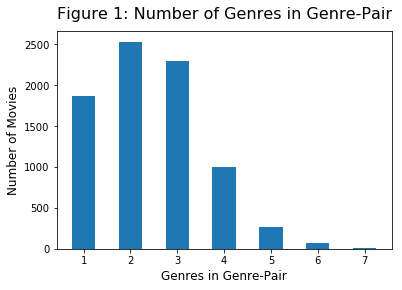

In [21]:
plot_genre_hist(movies_genres_raw)

*Check that Genre Totals Match*

In [22]:
sum(genre_totals_raw.iloc[:, 0])

19611

In [23]:
sum(movies_genres_raw.loc[:,'num_genres'])

19611

### Create Heat Map of Genre Relationships

In [24]:
def norm_genre_pairs(tmdb_genre_df, genre_pairs, genre_totals):

    new_idx = tmdb_genre_df['genre']
    new_cols = tmdb_genre_df['genre']

    #set the same x/y axis genre to 0 
    genre_pairs_plot = genre_pairs.copy()

    for idx in new_idx:
        genre_pairs_plot.set_value(idx, idx, 0)

    norm_genre_pairs_plot = genre_pairs_plot.copy()

    for j in range(0, len(genre_totals)):
        for i in range(0, len(genre_totals)):
            norm_genre_pairs_plot.iloc[i, j] = float(genre_pairs_plot.iloc[i, j]) / int(genre_totals.iloc[j])

    return norm_genre_pairs_plot

In [25]:
norm_genre_pairs_plot_raw = norm_genre_pairs(tmdb_genre_df, genre_pairs_raw, genre_totals_raw)
norm_genre_pairs_plot_raw

genre              Action  Adventure  Animation    Comedy     Crime  \
genre                                                                 
Action           0.000000   0.556604   0.237342  0.129811  0.420345   
Adventure        0.335227   0.000000   0.373418  0.110917  0.064299   
Animation        0.085227   0.222642   0.000000  0.078376  0.008637   
Comedy           0.210795   0.299057   0.354430  0.000000  0.239923   
Crime            0.248864   0.063208   0.014241  0.087474  0.000000   
Documentary      0.003977   0.006604   0.007911  0.006998  0.008637   
Drama            0.303409   0.236792   0.099684  0.328202  0.571977   
Family           0.051136   0.281132   0.577532  0.143457  0.006718   
Fantasy          0.131818   0.287736   0.262658  0.078376  0.014395   
History          0.044318   0.039623   0.001582  0.005598  0.014395   
Horror           0.094318   0.044340   0.020570  0.048985  0.060461   
Music            0.004545   0.008491   0.030063  0.038139  0.009597   
Mystery          0.052273   0.038679   0.023734  0.018195  0.166987   
Romance          0.049432   0.070755   0.041139  0.241428  0.051823   
Science Fiction  0.239205   0.235849   0.191456  0.050385  0.022073   
TV Movie         0.003977   0.018868   0.012658  0.013996  0.004798   
Thriller         0.445455   0.214151   0.037975  0.060532  0.609405   
War              0.036932   0.025472   0.001582  0.003149  0.005758   
Western          0.014773   0.020755   0.004747  0.005948  0.008637   
Foreign          0.002841   0.001887   0.001582  0.002099  0.000960   

genre            Documentary     Drama    Family   Fantasy   History  \
genre                                                                  
Action              0.022293  0.145981  0.120482  0.337700  0.302326   
Adventure           0.022293  0.068617  0.398929  0.443959  0.162791   
Animation           0.015924  0.017223  0.488621  0.241630  0.003876   
Comedy              0.063694  0.256424  0.548862  0.326055  0.062016   
Crime               0.028662  0.162931  0.009371  0.021834  0.058140   
Documentary         0.000000  0.006561  0.014726  0.001456  0.050388   
Drama               0.076433  0.000000  0.179384  0.270742  0.860465   
Family              0.035032  0.036632  0.000000  0.305677  0.007752   
Fantasy             0.003185  0.050847  0.281124  0.000000  0.011628   
History             0.041401  0.060689  0.002677  0.004367  0.000000   
Horror              0.009554  0.056315  0.004016  0.126638  0.011628   
Music               0.114650  0.035539  0.045515  0.018923  0.007752   
Mystery             0.003185  0.078732  0.013387  0.077147  0.015504   
Romance             0.000000  0.229907  0.093708  0.135371  0.112403   
Science Fiction     0.003185  0.046747  0.100402  0.227074  0.003876   
TV Movie            0.006369  0.012849  0.060241  0.026201  0.019380   
Thriller            0.012739  0.264899  0.014726  0.160116  0.139535   
War                 0.025478  0.040459  0.000000  0.004367  0.259690   
Western             0.000000  0.007928  0.002677  0.004367  0.003876   
Foreign             0.009554  0.004647  0.002677  0.000000  0.007752   

genre              Horror     Music   Mystery   Romance  Science Fiction  \
genre                                                                      
Action           0.150772  0.033898  0.155143  0.069767         0.510922   
Adventure        0.042688  0.038136  0.069140  0.060144         0.303398   
Animation        0.011807  0.080508  0.025295  0.020850         0.146845   
Comedy           0.127157  0.461864  0.087690  0.553328         0.174757   
Crime            0.057221  0.042373  0.293423  0.043304         0.027913   
Documentary      0.002725  0.152542  0.001686  0.000000         0.001214   
Drama            0.187103  0.550847  0.485666  0.674419         0.207524   
Family           0.002725  0.144068  0.016863  0.056135         0.091019   
Fantasy          0.079019  0.055085  0.089376  0.074579         0.189320   
History         

In [26]:
def plot_heat_map(tmdb_genre_df, norm_genre_pairs_plot):

    new_idx = tmdb_genre_df['genre']
    new_cols = tmdb_genre_df['genre']

    data = norm_genre_pairs_plot
    fig, ax = plt.subplots(figsize = (12,12))
    heatmap = ax.pcolor(data, cmap=plt.cm.Blues)
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor = False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor = False)

    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.set_xticklabels(new_idx, minor=False, fontsize=7)
    ax.set_yticklabels(new_cols, minor=False, fontsize=7)

    plt.ylabel('...Likelihood of ______ also Listed as Genre', fontsize=20)
    plt.title('If ______ Listed as a Genre...',
             horizontalalignment='center',
             fontsize=20,
             y = 1.04)

    plt.show()

In [27]:
plot_heat_map(tmdb_genre_df, norm_genre_pairs_plot_raw)

### Reducing Genres: Relabeling

In [28]:
def genre_reducer(movies_genres_table, genre_id_table, genre_id_to_change, new_genre_id):
    
    genre_id_table = genre_id_table[genre_id_table.genre_id != genre_id_to_change] # remove genre from genre list
    
    num_rows = movies_genres_table.shape[0]
    
    for row in range(0, num_rows):
        
        # pull out number of genres and genre id list
        num_ids = movies_genres_table.iloc[row, 1]
        id_list = movies_genres_table.iloc[row][2:(2 + num_ids)]

        # change genre ids
        for i in range(0, num_ids):
            if id_list[i] == genre_id_to_change:
                id_list[i] = new_genre_id
        
        new_id_list = list(set(id_list)) # remove duplicates
        new_num_ids = len(new_id_list) # get new number of genres

        # change movies genres table to reflect new genre ids
        movies_genres_table.iloc[row, 1] = new_num_ids 
        movies_genres_table.iloc[row][2:(2 + new_num_ids)] = new_id_list
        movies_genres_table.iloc[row][(2 + new_num_ids):] = 0
    
    return genre_id_table, movies_genres_table

In [29]:
genre_id_multilabel = tmdb_genre_df.copy()
movies_genres_multilabel = movies_genres_raw.copy()

In [30]:
# change all "adventure" to "action"
genre_id_multilabel, movies_genres_multilabel = genre_reducer(movies_genres_multilabel, genre_id_multilabel, 12, 28)

In [31]:
# change all "sci fi" to "action"
genre_id_multilabel, movies_genres_multilabel = genre_reducer(movies_genres_multilabel, genre_id_multilabel, 878, 28)

In [32]:
# change all "war" to "drama"
genre_id_multilabel, movies_genres_multilabel = genre_reducer(movies_genres_multilabel, genre_id_multilabel, 10752, 18)

In [33]:
# change all "western" to "drama"
genre_id_multilabel, movies_genres_multilabel = genre_reducer(movies_genres_multilabel, genre_id_multilabel, 37, 18)

In [34]:
# change all "mystery" to "thriller"
genre_id_multilabel, movies_genres_multilabel = genre_reducer(movies_genres_multilabel, genre_id_multilabel, 9648, 53)

In [35]:
# change all "horror" to "thriller"
genre_id_multilabel, movies_genres_multilabel = genre_reducer(movies_genres_multilabel, genre_id_multilabel, 27, 53)

In [36]:
# change all "history" to "drama"
genre_id_multilabel, movies_genres_multilabel = genre_reducer(movies_genres_multilabel, genre_id_multilabel, 36, 18)

In [37]:
# change all "tv movie" to "drama"
genre_id_multilabel, movies_genres_multilabel = genre_reducer(movies_genres_multilabel, genre_id_multilabel, 10770, 18)

In [38]:
# change all "foreign" to "drama"
genre_id_multilabel, movies_genres_multilabel = genre_reducer(movies_genres_multilabel, genre_id_multilabel, 10769, 18)

In [39]:
# change all "fantasy" to "action"
genre_id_multilabel, movies_genres_multilabel = genre_reducer(movies_genres_multilabel, genre_id_multilabel, 14, 28)

In [40]:
# change all "music" to "drama"
genre_id_multilabel, movies_genres_multilabel = genre_reducer(movies_genres_multilabel, genre_id_multilabel, 10402, 18)

In [41]:
# change all "crime" to "thriller"
genre_id_multilabel, movies_genres_multilabel = genre_reducer(movies_genres_multilabel, genre_id_multilabel, 80, 53)

In [42]:
### ADD/REMOVE GENRE CHANGES HERE

In [43]:
genre_id_multilabel = genre_id_multilabel.reset_index(drop=True)
genre_id_multilabel

genre_id        genre
0       28       Action
1       16    Animation
2       35       Comedy
3       99  Documentary
4       18        Drama
5    10751       Family
6    10749      Romance
7       53     Thriller

### Table and Heat Map of Reduced Genre Relationships

In [44]:
genre_pairs_multilabel = create_genre_pairs(genre_id_multilabel, movies_genres_multilabel)
genre_pairs_multilabel

genre        Action  Animation  Comedy  Documentary  Drama  Family  Romance  \
genre                                                                         
Action         2815        408     744           14    976     419      226   
Animation       408        632     224            5     91     365       26   
Comedy          744        224    2858           20   1039     410      690   
Documentary      14          5      20          314     75      11        0   
Drama           976         91    1039           75   3927     185      866   
Family          419        365     410           11    185     747       70   
Romance         226         26     690            0    866      70     1247   
Thriller       1374         49     479           15   1358      27      170   

genre        Thriller  
genre                  
Action           1374  
Animation          49  
Comedy            479  
Documentary        15  
Drama            1358  
Family             27  
Romance           170  
Thriller         3140

In [45]:
genre_totals_multilabel = get_genre_totals(genre_id_multilabel, genre_pairs_multilabel)
genre_totals_multilabel

num_movies_with_genre
genre                            
Action                       2815
Animation                     632
Comedy                       2858
Documentary                   314
Drama                        3927
Family                        747
Romance                      1247
Thriller                     3140

In [46]:
norm_genre_pairs_multilabel = norm_genre_pairs(genre_id_multilabel, genre_pairs_multilabel, genre_totals_multilabel)
norm_genre_pairs_multilabel

genre          Action  Animation    Comedy  Documentary     Drama    Family  \
genre                                                                         
Action       0.000000   0.645570  0.260322     0.044586  0.248536  0.560910   
Animation    0.144938   0.000000  0.078376     0.015924  0.023173  0.488621   
Comedy       0.264298   0.354430  0.000000     0.063694  0.264579  0.548862   
Documentary  0.004973   0.007911  0.006998     0.000000  0.019099  0.014726   
Drama        0.346714   0.143987  0.363541     0.238854  0.000000  0.247657   
Family       0.148845   0.577532  0.143457     0.035032  0.047110  0.000000   
Romance      0.080284   0.041139  0.241428     0.000000  0.220525  0.093708   
Thriller     0.488099   0.077532  0.167600     0.047771  0.345811  0.036145   

genre         Romance  Thriller  
genre                            
Action       0.181235  0.437580  
Animation    0.020850  0.015605  
Comedy       0.553328  0.152548  
Documentary  0.000000  0.004777  
Drama        0.694467  0.432484  
Family       0.056135  0.008599  
Romance      0.000000  0.054140  
Thriller     0.136327  0.000000

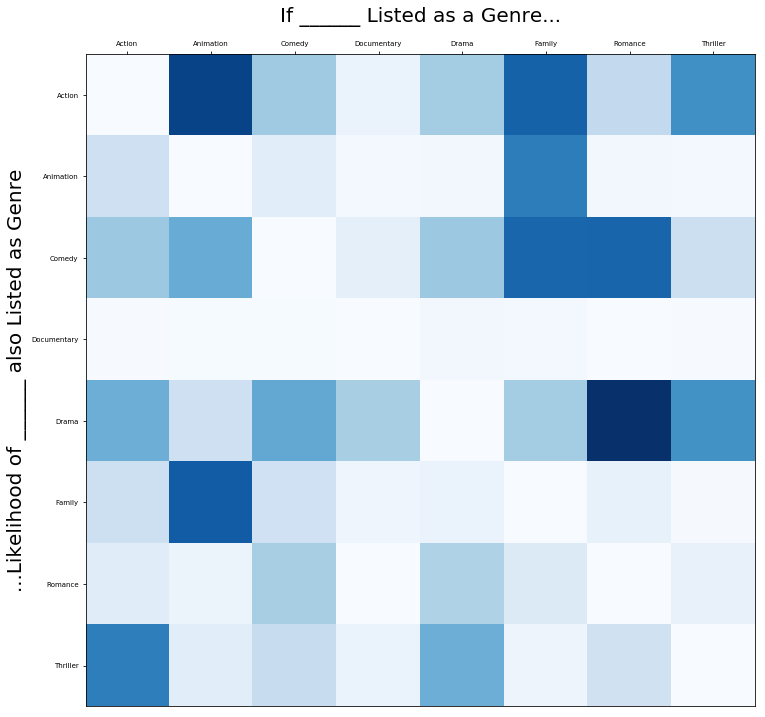

In [47]:
plot_heat_map(genre_id_multilabel, norm_genre_pairs_multilabel)

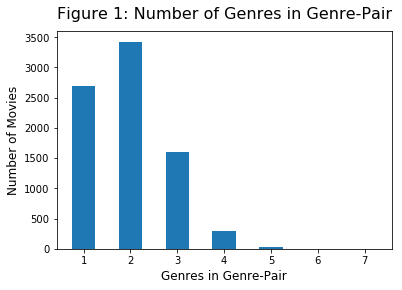

In [48]:
plot_genre_hist(movies_genres_multilabel)

### Get Unique Genre Combos

In [49]:
def get_unique_genre_pairs(movies_genres):
    
    np_empty = np.empty((len(movies_genres),2))
    np_empty[:] = np.nan

    genres_list_df = pd.DataFrame(np_empty, columns=['movie_id', 'genre_id'])

    genres_list_df = genres_list_df.astype(object)
    genres_as_list = list()

    for i in range(0, len(movies_genres)):
        num_genres = movies_genres.iloc[i, 1]
        genres_list = list(movies_genres.iloc[i, 2:(2 + num_genres)])
        genres_list.sort()
        genres_as_list.append(genres_list)

        genres_list_df.iloc[i, 0] = movies_genres.iloc[i, 0]
        genres_list_df.iloc[i, 1] = genres_list

    unique_genres_list = [list(x) for x in set(tuple(x) for x in genres_as_list)] # from stack overflow...

    unique_genres_df = pd.DataFrame(columns=['genre_id', 'num_movies'])

    unique_genres_df.loc[:, 'genre_id'] = unique_genres_list
    unique_genres_df.loc[:, 'num_movies'] = 0


    for i in range(0, len(unique_genres_df)):
        unique_genres_df.iloc[i, 1] = genres_as_list.count(unique_genres_df.iloc[i, 0])

    unique_genres_sorted = unique_genres_df.sort_values('num_movies', ascending=False).reset_index(drop=True)

    return unique_genres_sorted, genres_list_df

In [50]:
unique_genres_multilabel, movies_genres_list_multilabel = get_unique_genre_pairs(movies_genres_multilabel)

In [51]:
unique_genres_multilabel.iloc[:10, :]

genre_id  num_movies
0             [18]         829
1         [18, 53]         729
2             [35]         683
3             [53]         681
4         [28, 53]         670
5         [18, 35]         419
6     [18, 28, 53]         395
7      [18, 10749]         324
8  [18, 35, 10749]         298
9             [28]         267

### Select Reduced Set of Genre Pairs

In [52]:
def select_genres(cutoff_threshold_pct, unique_genres):

    cutoff_threshold_num = int(cutoff_threshold_pct * sum(unique_genres.iloc[:, 1]))
    cutoff_row = 0

    for i in range(0, len(unique_genres)):
        if unique_genres.iloc[i, 1] > cutoff_threshold_num:
            cutoff_row = cutoff_row + 1

    selected_genres = unique_genres.iloc[:cutoff_row, :]
    selected_genres = selected_genres.reset_index(drop=True)
    return selected_genres

In [53]:
selected_genres_multilabel = select_genres(0.01, unique_genres_multilabel)

In [54]:
selected_genres_multilabel

genre_id  num_movies
0                  [18]         829
1              [18, 53]         729
2                  [35]         683
3                  [53]         681
4              [28, 53]         670
5              [18, 35]         419
6          [18, 28, 53]         395
7           [18, 10749]         324
8       [18, 35, 10749]         298
9                  [28]         267
10             [18, 28]         266
11          [35, 10749]         237
12                 [99]         194
13         [28, 35, 53]         155
14             [35, 53]         155
15             [28, 35]         154
16             [16, 28]         100
17  [16, 28, 35, 10751]          98
18      [16, 28, 10751]          91
19          [16, 10751]          82

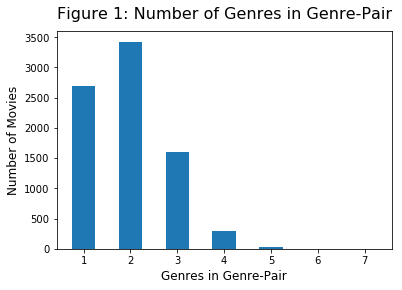

In [57]:
plot_genre_hist(movies_genres_multilabel)

In [58]:
sum(selected_genres_multilabel.iloc[:, 1])

6827

In [59]:
1 - float(sum(selected_genres_multilabel.iloc[:, 1])) / len(movies_genres_multilabel)

0.1529776674937965

### Revised Overall Dataset to Reflect Reduced Genre Pairs

In [60]:
def selected_movies(movies_genres_list, selected_genres):

    row_ref = 0
    selected_movies = movies_genres_list.copy()

    for i in range(0, len(movies_genres_list)):

        for j in range(0, len(selected_genres)):

            if (movies_genres_list.iloc[i, 1] == selected_genres.iloc[j, 0]):

                selected_movies.iloc[row_ref, :] = movies_genres_list.iloc[i, :]
                row_ref = row_ref + 1

    selected_movies = selected_movies.iloc[:row_ref, :]
    
    return selected_movies

In [61]:
selected_movies_multilabel = selected_movies(movies_genres_list_multilabel, selected_genres_multilabel)

In [62]:
selected_movies_multilabel.iloc[:10, :]

movie_id             genre_id
0   297761             [28, 53]
1   209112                 [28]
2   271110                 [28]
3   329865         [18, 28, 53]
4   284052                 [28]
5   246655                 [28]
6   269149  [16, 28, 35, 10751]
7   259316                 [28]
8   330459             [18, 28]
9   127380  [16, 28, 35, 10751]

In [63]:
len(selected_movies_multilabel)

6827

In [64]:
sum(selected_genres_multilabel.iloc[:, 1])

6827

### Add Genre Names

In [65]:
def get_genre_names(genre_ids, tmdb_genre_df):

    genre_names_df = pd.DataFrame(index=range(0, len(genre_ids)), columns=['genre_name'])
    genre_names_df = genre_names_df.astype(object)

    for i in range(0, len(genre_ids)):

        genre_names_list = list()

        for j in range(0, len(genre_ids[i])):

            for k in range(0, len(tmdb_genre_df)):

                if (tmdb_genre_df.loc[k, 'genre_id'] == genre_ids[i][j]):

                    genre_names_list.append(tmdb_genre_df.loc[k, 'genre'])

        genre_names_df.loc[i, 'genre_name'] = list(genre_names_list)
    
    return genre_names_df

*Add Genre Names to Number of Movies List*

In [66]:
selected_genres_multilabel_genre_ids = pd.Series(selected_genres_multilabel.loc[:, 'genre_id'])

In [67]:
genres_with_names = get_genre_names(selected_genres_multilabel_genre_ids, tmdb_genre_df)

In [68]:
selected_genres_multilabel_sums = pd.concat((genres_with_names, selected_genres_multilabel), axis=1)

In [69]:
selected_genres_multilabel_sums

genre_name             genre_id  num_movies
0                               [Drama]                 [18]         829
1                     [Drama, Thriller]             [18, 53]         729
2                              [Comedy]                 [35]         683
3                            [Thriller]                 [53]         681
4                    [Action, Thriller]             [28, 53]         670
5                       [Drama, Comedy]             [18, 35]         419
6             [Drama, Action, Thriller]         [18, 28, 53]         395
7                      [Drama, Romance]          [18, 10749]         324
8              [Drama, Comedy, Romance]      [18, 35, 10749]         298
9                              [Action]                 [28]         267
10                      [Drama, Action]             [18, 28]         266
11                    [Comedy, Romance]          [35, 10749]         237
12                        [Documentary]                 [99]         194
13           [Action, Comedy, Thriller]         [28, 35, 53]         155
14                   [Comedy, Thriller]             [35, 53]         155
15                     [Action, Comedy]             [28, 35]         154
16                  [Animation, Action]             [16, 28]         100
17  [Animation, Action, Comedy, Family]  [16, 28, 35, 10751]          98
18          [Animation, Action, Family]      [16, 28, 10751]          91
19                  [Animation, Family]          [16, 10751]          82

In [70]:
selected_genres_multilabel_sums.to_csv('selected_genres_multilabel_sums.csv', index=False)

*Add Genre Names to Selected Movies List*

In [71]:
selected_movies_multilabel_genre_ids = pd.Series(selected_movies_multilabel.loc[:, 'genre_id'])

In [72]:
genres_with_names = get_genre_names(selected_movies_multilabel_genre_ids, tmdb_genre_df)

In [73]:
selected_movies_multilabel = pd.concat((selected_movies_multilabel, genres_with_names), axis=1)

In [74]:
selected_movies_multilabel.iloc[:10, :]

movie_id             genre_id                           genre_name
0   297761             [28, 53]                   [Action, Thriller]
1   209112                 [28]                             [Action]
2   271110                 [28]                             [Action]
3   329865         [18, 28, 53]            [Drama, Action, Thriller]
4   284052                 [28]                             [Action]
5   246655                 [28]                             [Action]
6   269149  [16, 28, 35, 10751]  [Animation, Action, Comedy, Family]
7   259316                 [28]                             [Action]
8   330459             [18, 28]                      [Drama, Action]
9   127380  [16, 28, 35, 10751]  [Animation, Action, Comedy, Family]

In [75]:
selected_movies_multilabel.to_csv('y_labels_multilabel.csv', index=False)

### Further Reduction to Multiclass

In [76]:
def genre_dominator(movies_genres, dominant_genre):
    
    dominant_genre_series = pd.Series([dominant_genre])
    
    for i in range(0, len(movies_genres)):
        
        genres_series = pd.Series(movies_genres.iloc[i, 2:13])
        
        if (dominant_genre_series.isin(genres_series)[0]):
            
            movies_genres.loc[i, 'num_genres'] = 1
            movies_genres.iloc[i, 2] = dominant_genre
            movies_genres.iloc[i, 3:13] = 0
            
    return movies_genres

In [77]:
movies_genres_multiclass = movies_genres_multilabel.copy()

In [78]:
# make any genre pair with 'documentary' ONLY 'documentary'
movies_genres_multiclass = genre_dominator(movies_genres_multiclass, 99)

In [79]:
# make any genre pair with 'animation' ONLY 'animation'
movies_genres_multiclass = genre_dominator(movies_genres_multiclass, 16)

In [80]:
# make any genre pair with 'romance' ONLY 'romance'
movies_genres_multiclass = genre_dominator(movies_genres_multiclass, 10749)

In [81]:
# make any genre pair with 'comedy' ONLY 'comedy'
movies_genres_multiclass = genre_dominator(movies_genres_multiclass, 35)

In [82]:
# make any genre pair with 'action' ONLY 'action'
movies_genres_multiclass = genre_dominator(movies_genres_multiclass, 28)

In [83]:
# make any genre pair with 'thriller' ONLY 'thriller'
movies_genres_multiclass = genre_dominator(movies_genres_multiclass, 53)

In [84]:
### ADD/CHANGE REDUCTION HERE!!!

In [85]:
genre_pairs_multiclass = create_genre_pairs(tmdb_genre_df, movies_genres_multiclass)

In [86]:
genre_id_multiclass = genre_id_multilabel.copy()

In [87]:
genre_totals_multiclass = get_genre_totals(genre_id_multiclass, genre_pairs_multiclass)
genre_totals_multiclass

num_movies_with_genre
genre                            
Action                       1683
Animation                     627
Comedy                       1930
Documentary                   314
Drama                         846
Family                         22
Romance                      1221
Thriller                     1412

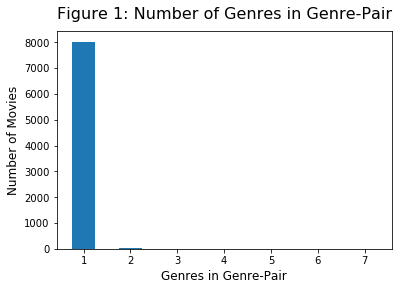

In [88]:
plot_genre_hist(movies_genres_multiclass)

In [89]:
unique_genres_multiclass, movies_genres_list_multiclass = get_unique_genre_pairs(movies_genres_multiclass)

In [90]:
unique_genres_multiclass

genre_id  num_movies
0         [35]        1930
1         [28]        1683
2         [53]        1412
3      [10749]        1221
4         [18]         829
5         [16]         627
6         [99]         314
7           []          22
8  [18, 10751]          17
9      [10751]           5

*Reduced Multiclass Genres (Remove Those Less Than Threshold)*

In [91]:
selected_genres_multiclass = select_genres(0.01, unique_genres_multiclass)

In [92]:
selected_genres_multiclass

genre_id  num_movies
0     [35]        1930
1     [28]        1683
2     [53]        1412
3  [10749]        1221
4     [18]         829
5     [16]         627
6     [99]         314

In [93]:
sum(selected_genres_multiclass.iloc[:, 1])

8016

In [94]:
1 - float(sum(selected_genres_multiclass.iloc[:, 1])) / len(movies_genres_multiclass)

0.0054590570719602605

*Revised Overall Multiclass Dataset*

In [95]:
selected_movies_multiclass = selected_movies(movies_genres_list_multiclass, selected_genres_multiclass)

In [96]:
selected_movies_multiclass.iloc[:20, :]

movie_id genre_id
0    293660  [10749]
1    297761     [28]
2    209112     [28]
3    271110     [28]
4    329865     [28]
5    284052     [28]
6    246655     [28]
7    269149     [16]
8    259316     [28]
9    330459     [28]
10   127380     [16]
11   328111     [16]
12   313369  [10749]
13   274870  [10749]
14   278927     [28]
15   291805     [35]
16   277834     [16]
17    47933     [28]
18   188927     [28]
19   258489     [28]

In [97]:
len(selected_movies_multiclass)

8016

In [98]:
sum(selected_genres_multiclass.iloc[:, 1])

8016

*Add Genre Names to Number of Movies List*

In [99]:
selected_genres_multiclass_genre_ids = pd.Series(selected_genres_multiclass.loc[:, 'genre_id'])

In [100]:
genres_with_names = get_genre_names(selected_genres_multiclass_genre_ids, tmdb_genre_df)

In [101]:
selected_genres_multiclass_sums = pd.concat((genres_with_names, selected_genres_multiclass), axis=1)

In [102]:
selected_genres_multiclass_sums

genre_name genre_id  num_movies
0       [Comedy]     [35]        1930
1       [Action]     [28]        1683
2     [Thriller]     [53]        1412
3      [Romance]  [10749]        1221
4        [Drama]     [18]         829
5    [Animation]     [16]         627
6  [Documentary]     [99]         314

In [103]:
selected_genres_multiclass_sums.to_csv('selected_genres_multiclass_sums.csv', index=False)

In [104]:
bar_values = selected_genres_multiclass_sums.iloc[:, 2]
position = np.arange(0.5, 7.5, 1.0)
y_labels = selected_genres_multiclass_sums.iloc[:, 0]

In [105]:
bar_values = bar_values[::-1]
y_labels = y_labels[::-1]

In [106]:
y_0 = str(y_labels[0]).strip("[]")
y_0

"u'Comedy'"

In [107]:
for i in range(0, len(y_labels)):
    
    y_labels[i] = str(y_labels[i]).strip("[]").strip("u'")
    
y_labels
    

6    Documentary
5      Animation
4          Drama
3        Romance
2       Thriller
1         Action
0         Comedy
Name: genre_name, dtype: object

In [108]:
plt.barh(position, bar_values, align='center')
plt.yticks(position, y_labels, fontsize=12)
plt.title('Figure 2: Movies per Multiclass Genre', fontsize=16, y=1.03)
plt.xlabel('Number of Movies', fontsize=12)

*Add Genre Names to Selected Movies List*

In [109]:
selected_movies_multiclass_genre_ids = pd.Series(selected_movies_multiclass.loc[:, 'genre_id'])

In [110]:
genres_with_names = get_genre_names(selected_movies_multiclass_genre_ids, tmdb_genre_df)

In [111]:
selected_movies_multiclass = pd.concat((selected_movies_multiclass, genres_with_names), axis=1)

In [112]:
selected_movies_multiclass.iloc[:10, :]

movie_id genre_id   genre_name
0   293660  [10749]    [Romance]
1   297761     [28]     [Action]
2   209112     [28]     [Action]
3   271110     [28]     [Action]
4   329865     [28]     [Action]
5   284052     [28]     [Action]
6   246655     [28]     [Action]
7   269149     [16]  [Animation]
8   259316     [28]     [Action]
9   330459     [28]     [Action]

In [113]:
selected_movies_multiclass.to_csv('y_labels_multiclass.csv', index=False)